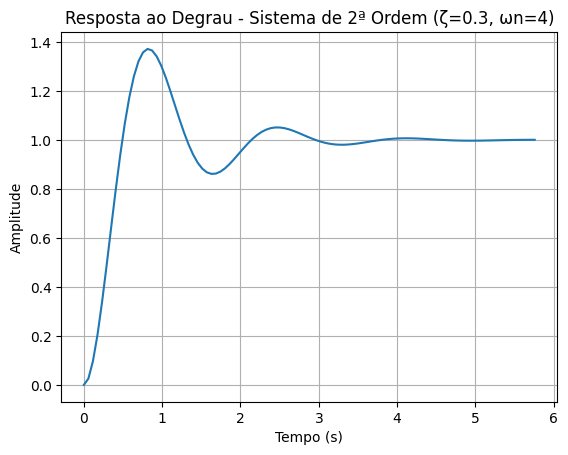

In [5]:
# Capítulo 5 - Desempenho de Sistemas de Controle
# Análise da resposta transitória e erro de regime permanente
# Instalando biblioteca de controle
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Sistema de 2ª ordem com ωn=4 rad/s e ζ=0.3
wn = 4
zeta = 0.3
num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
T = ctrl.tf(num, den)

# Resposta ao degrau
t, y = ctrl.step_response(T)

plt.figure()
plt.plot(t, y)
plt.title("Resposta ao Degrau - Sistema de 2ª Ordem (ζ=0.3, ωn=4)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


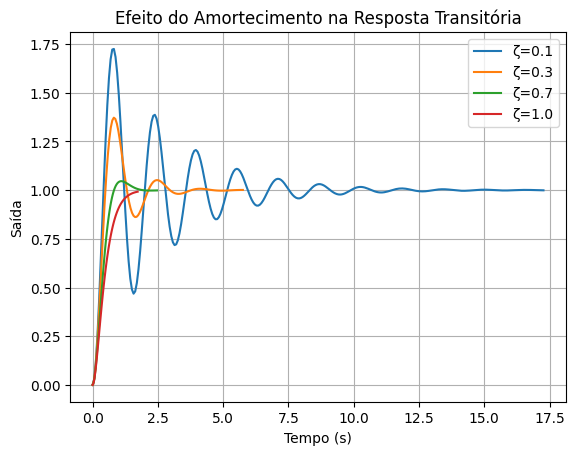

In [6]:
# Alterando o fator de amortecimento
zetas = [0.1, 0.3, 0.7, 1.0]
plt.figure()
for z in zetas:
    den = [1, 2*z*wn, wn**2]
    Tz = ctrl.tf(num, den)
    t, y = ctrl.step_response(Tz)
    plt.plot(t, y, label=f'ζ={z}')

plt.title("Efeito do Amortecimento na Resposta Transitória")
plt.xlabel("Tempo (s)")
plt.ylabel("Saída")
plt.grid(True)
plt.legend()
plt.show()

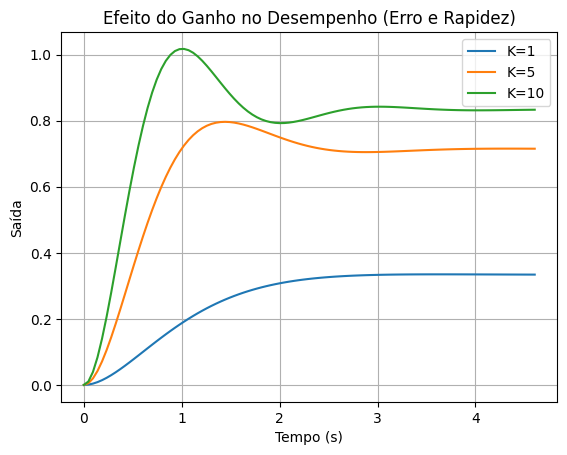

In [7]:
# Sistema de controle com ganho variável
K_values = [1, 5, 10]
G = ctrl.tf([1], [1, 3, 2])

plt.figure()
for K in K_values:
    C = ctrl.tf([K], [1])
    T = ctrl.feedback(C*G, 1)
    t, y = ctrl.step_response(T)
    plt.plot(t, y, label=f'K={K}')
plt.title("Efeito do Ganho no Desempenho (Erro e Rapidez)")
plt.xlabel("Tempo (s)")
plt.ylabel("Saída")
plt.legend()
plt.grid(True)
plt.show()